In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import rcParams
from scipy.stats import norm



In [2]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Set the data directory to the parent directory of the current working directory
wdir = os.path.dirname(current_dir)
# Change the current working directory to the parent directory
os.chdir(wdir)

In [3]:
# Set the font globally
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9

In [4]:
# Load data
fraction_mut_variant_res_ = np.loadtxt("data/Suplementary_Fig_2/fraction_mut_variant_res.txt")
times_ = np.loadtxt("data/Suplementary_Fig_2/time.txt")
j1 = np.loadtxt("data/Suplementary_Fig_2/jump_1.txt")
j2 = np.loadtxt("data/Suplementary_Fig_2/jump_2.txt")
slope_ = np.loadtxt("data/Suplementary_Fig_2/slope.txt")
max_dif_slope_non_cd_ = np.loadtxt("data/Suplementary_Fig_2/max_dif_slope_non_cd.txt");


In [5]:
# Fit a normal distribution to the data
dis_max = norm.fit(max_dif_slope_non_cd_)
bins = np.linspace(np.min(max_dif_slope_non_cd_), np.max(max_dif_slope_non_cd_), 50);


In [6]:
# define plotwidth
def cm2inch(x): return float(x)/2.54
plotwidth    = cm2inch(8.90)


/var/folders/ss/2frlt8v119514lf5x00hdshh0000gn/T/ipykernel_17268/2482885231.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax1.plot(x, p, 'k', linewidth=2, color='black', label="Normal-fit")


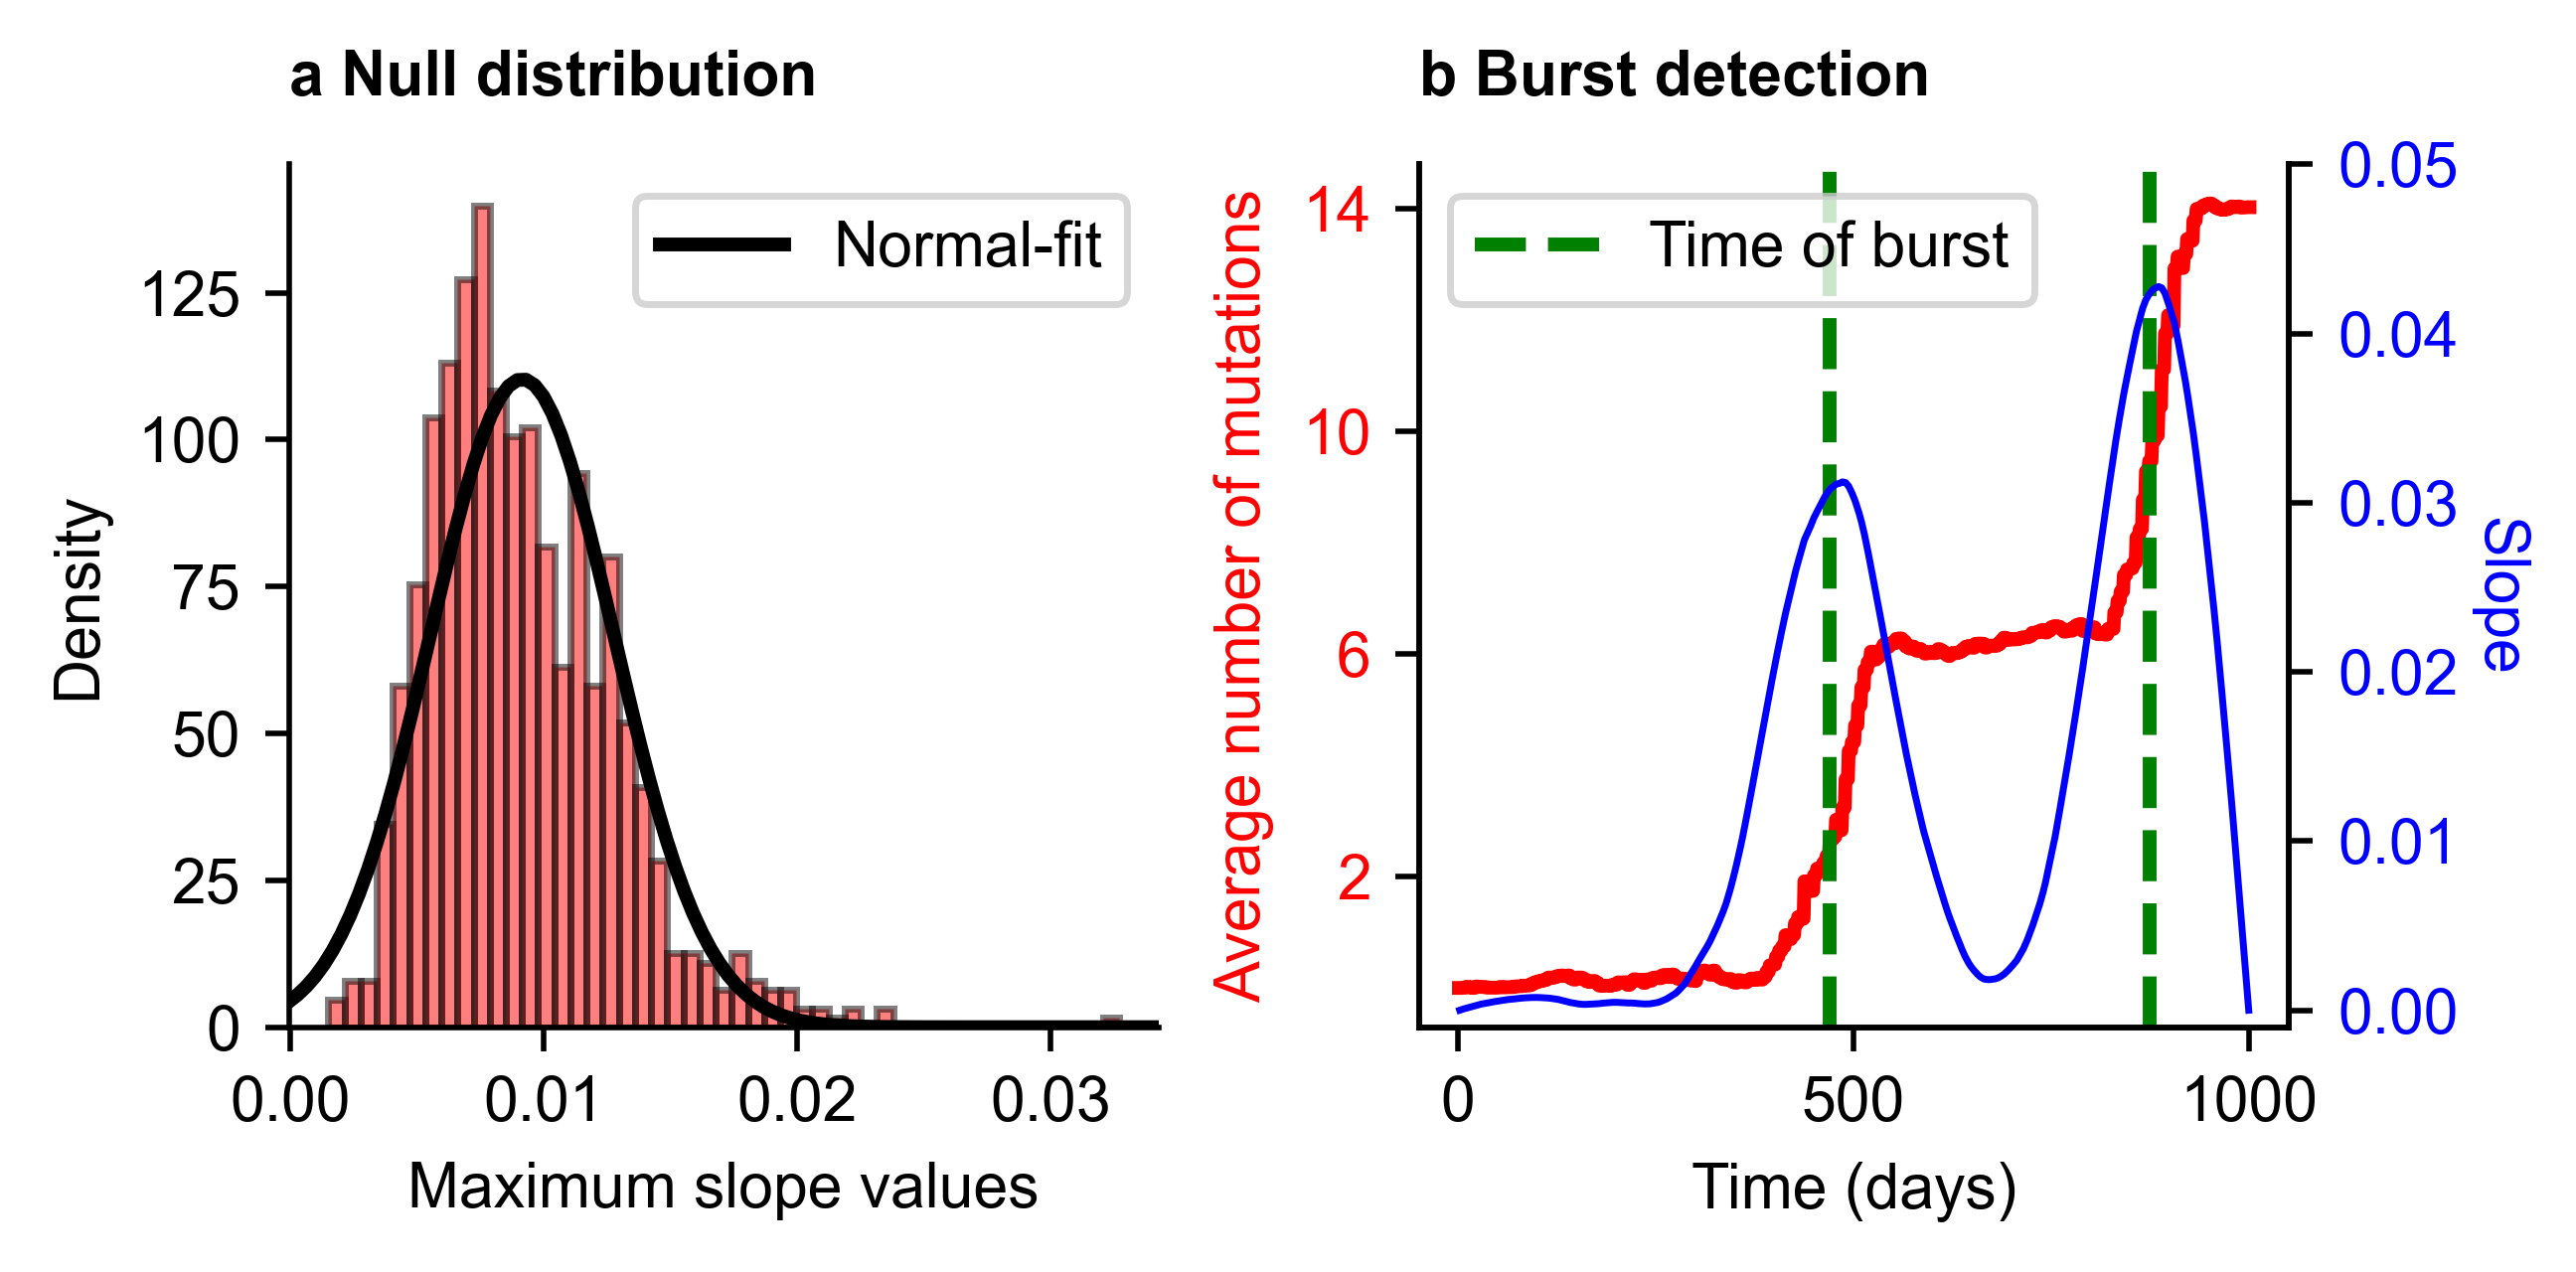

In [7]:
# Create a single figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(1.5*plotwidth, plotwidth),dpi=500)  # Adjust the figsize according to your layout

# Plot the histogram with PDF in the first subplot
ax1 = axs[0]
ax1.hist(max_dif_slope_non_cd_, bins=bins, density=True, color='red', edgecolor='black', alpha=0.5, label="")
xmin, xmax = ax1.set_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, dis_max[0], dis_max[1])
ax1.plot(x, p, 'k', linewidth=2, color='black', label="Normal-fit")
ax1.set_xlabel("Maximum slope values")
ax1.set_ylabel("Density")
ax1.legend(loc='upper right')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot the time series in the second subplot
ax2 = axs[1]
ax2.plot(times_, fraction_mut_variant_res_, lw=2, color='red', label='')
ax2.set_xlabel("Time (days)")
ax2.set_ylabel("Average number of mutations", color='red')
ax2.tick_params(axis='y', labelcolor='red')
#axs[1].ylim([0, 12])

ax3 = ax2.twinx()
ax3.plot(times_[1:1000], slope_, lw=1, color='blue', label='')

ax3.set_ylabel("Slope", color='blue',rotation=270,labelpad=10)
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylim([-0.001, 0.05])

ax2.axvline(x=j1, color='green', lw=2, linestyle='dashed', label='Time of burst')
ax2.axvline(x=j2, color='green', lw=2, linestyle='dashed')
ax2.legend(loc='upper left')

ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

axs[0].set_title('a Null distribution ', loc='left', fontname='Arial',pad=10,weight='bold')

axs[1].set_title('b Burst detection', loc='left', fontname='Arial',pad=10,weight='bold')

#fig.legend(loc='upper center')

# Customize margins and font sizes
fig.tight_layout()
plt.subplots_adjust(bottom=0.4,hspace=0.2,wspace=0.3)

#plt.subplots_adjust(top=0.9)
axs[1].set_yticks([2.0, 6.0,10.0,14.0])

# Show the plot
plt.show()
